In [1]:
from regression_toolbox.model import Model, add_model, delete_model
from regression_toolbox.likelihood import Likelihood
from regression_toolbox.parameter import Parameter
from visualisation_toolbox.domain import Domain
from regression_toolbox.sampler import Sampler
from visualisation_toolbox.visualiser import RegressionVisualiser
from data_processing.sim_data_processor import SimDataProcessor
from data_processing.raw_data_processor import RawDataProcessor
import numpy as np
import pandas as pd
import os
import jax

os.chdir('/PhD_project/')

jax.config.update("jax_enable_x64", True)


/build/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sim_model = Model('line').add_fixed_model_param('a', 1).add_fixed_model_param('b', 1)
sim_domain = Domain(1, 'linear').add_domain_param('min', 0).add_domain_param('max', 10).add_domain_param('n_points', 100)
sim_domain.build_domain()
sim_data_processor = SimDataProcessor('sandbox_3', sim_model, sim_domain,noise_dist='gaussian' ,noise_level=1)

model = Model('line')

# likelihood = Likelihood('gaussian_percentage_error')
likelihood = Likelihood('gaussian')

a_b = Parameter(name=['a','b'],prior_select='log_norm', multi_mode=True).add_prior_param('peak',  [[0.5,0.5], [1.5,1.5]]).add_prior_param('overall_scale', 0.1)

sigma = Parameter(name='sigma',prior_select='uniform').add_prior_param('low',  0.0001).add_prior_param('high', 5)

inference_params = pd.Series({'a_and_b': a_b, 'sigma':sigma})

sampler = Sampler(inference_params, model, likelihood, sim_data_processor, n_samples = 1000, n_chains=1)
# sampler = Sampler(inference_params, model, likelihood, raw_data_processor, n_samples = 10000, n_chains=3)
sampler.sample_all()

visualiser = RegressionVisualiser(sampler)
visualiser.show_predictions(sim_domain, 'test_plot', '1D')

Data loaded from /PhD_project/data/processed_sim_data/sandbox_3
Samples loaded from /PhD_project/results/regression_results/sandbox_3/instance_2


In [3]:
# add_model('parabaloid', 'a*x^2 + b*y^2', ['x','y'], ['C'], ['a','b'])

sim_model = Model('parabaloid').add_fixed_model_param('a', 3).add_fixed_model_param('b', 1)
sim_domain = Domain(2, 'circular').add_domain_param('radius', 10).add_domain_param('mass', 1000)
sim_domain.build_domain()
sim_data_processor = SimDataProcessor('sandbox_6', sim_model, sim_domain,noise_dist='gaussian' ,noise_level=2)

model = Model('parabaloid')

# likelihood = Likelihood('gaussian_percentage_error')
likelihood = Likelihood('gaussian')

a = Parameter(name='a',prior_select='uniform').add_prior_param('low',  0).add_prior_param('high', 10)
b = Parameter(name='b',prior_select='uniform').add_prior_param('low',  0).add_prior_param('high', 10)

sigma = Parameter(name='sigma',prior_select='uniform').add_prior_param('low',  0.0001).add_prior_param('high', 10)

inference_params = pd.Series({'a': a, 'b':b, 'sigma':sigma})

sampler = Sampler(inference_params, model, likelihood, sim_data_processor, n_samples = 1000, n_chains=1)
# sampler = Sampler(inference_params, model, likelihood, raw_data_processor, n_samples = 10000, n_chains=3)
sampler.sample_all()


vis_domain = Domain(2, 'circular').add_domain_param('radius', 10).add_domain_param('mass', 1000)
vis_domain.build_domain()
visualiser = RegressionVisualiser(sampler)
visualiser.show_predictions(vis_domain, 'test_plot', '2D')

Data loaded from /PhD_project/data/processed_sim_data/sandbox_6
Samples loaded from /PhD_project/results/regression_results/sandbox_6/instance_1


Data loaded from /PhD_project/data/processed_sim_data/sandbox_7


sample: 100%|██████████| 1500/1500 [00:02<00:00, 727.86it/s, 7 steps of size 3.29e-01. acc. prob=0.94] 


Samples saved to /PhD_project/results/regression_results/sandbox_7/instance_1
Animation saved as /PhD_project/results/regression_results/sandbox_7/instance_1/test_plot/predictions.gif


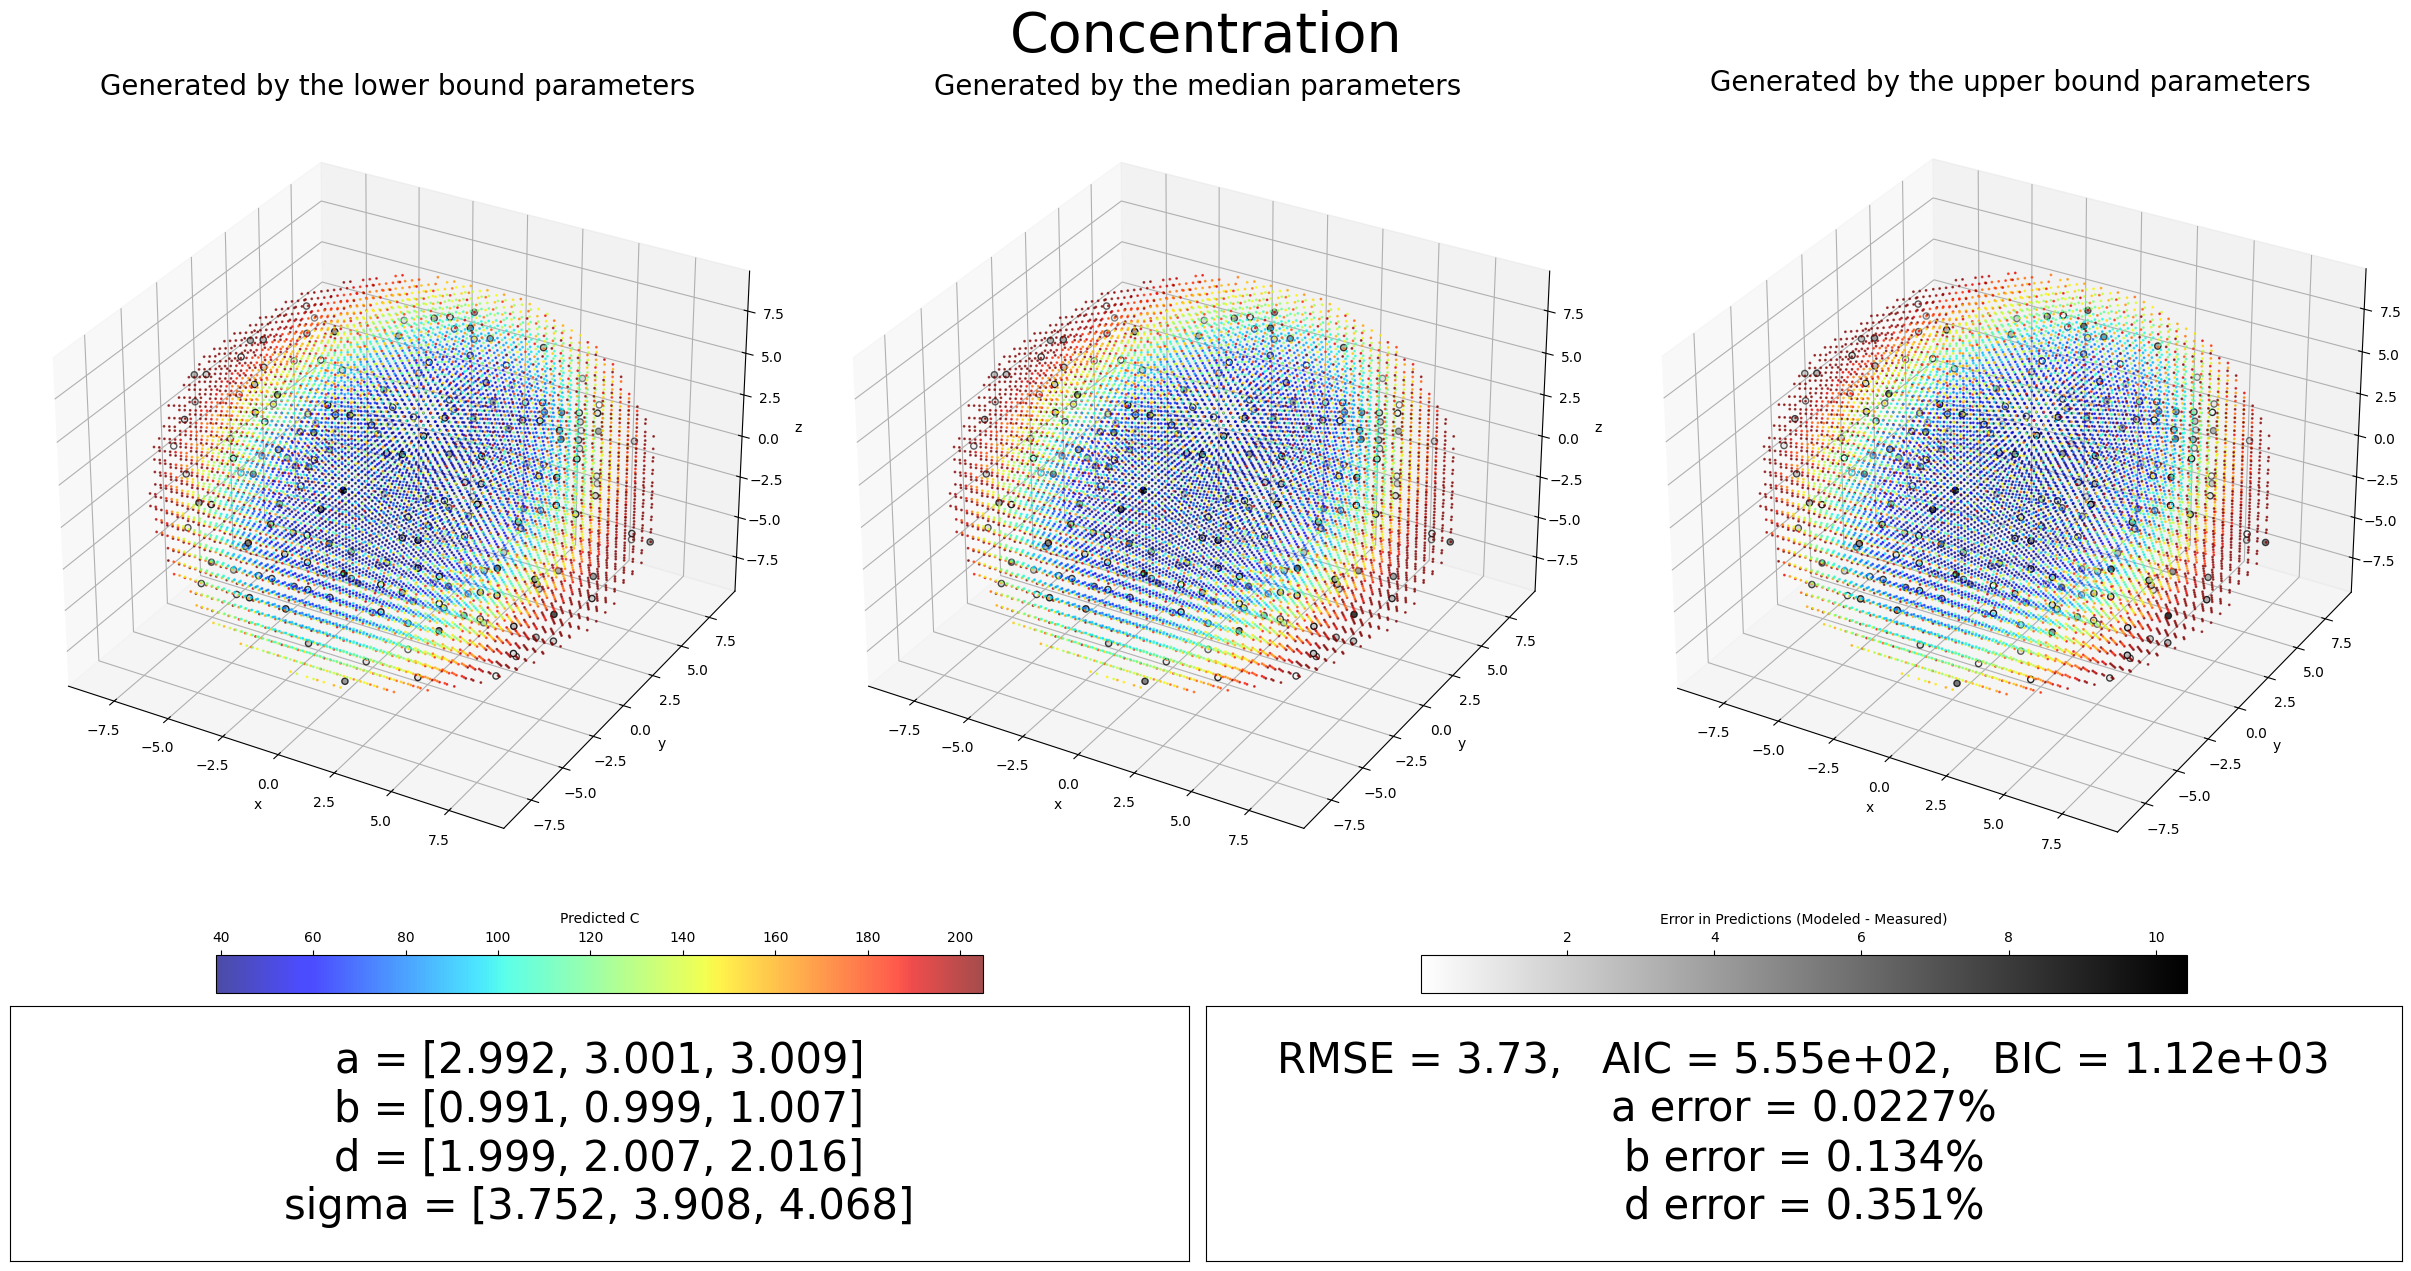

In [4]:
# add_model('parabaloid_3D', 'a*x^2 + b*y^2 + d*z^2', ['x','y','z'], ['C'], ['a','b','d'])

sim_model = Model('parabaloid_3D').add_fixed_model_param('a', 3).add_fixed_model_param('b', 1).add_fixed_model_param('d', 2)
sim_domain = Domain(3, 'spherical').add_domain_param('radius', 10).add_domain_param('mass', 1000)
sim_domain.build_domain()
sim_data_processor = SimDataProcessor('sandbox_7', sim_model, sim_domain,noise_dist='gaussian' ,noise_level=2)

model = Model('parabaloid_3D')

# likelihood = Likelihood('gaussian_percentage_error')
likelihood = Likelihood('gaussian')

a = Parameter(name='a',prior_select='uniform').add_prior_param('low',  0).add_prior_param('high', 10)
b = Parameter(name='b',prior_select='uniform').add_prior_param('low',  0).add_prior_param('high', 10)
d = Parameter(name='d',prior_select='uniform').add_prior_param('low',  0).add_prior_param('high', 10)

sigma = Parameter(name='sigma',prior_select='uniform').add_prior_param('low',  0.0001).add_prior_param('high', 10)

inference_params = pd.Series({'a': a, 'b':b, 'd':d, 'sigma':sigma})

sampler = Sampler(inference_params, model, likelihood, sim_data_processor, n_samples = 1000, n_chains=1)
# sampler = Sampler(inference_params, model, likelihood, raw_data_processor, n_samples = 10000, n_chains=3)
sampler.sample_all()


vis_domain = Domain(3, 'spherical').add_domain_param('radius', 10).add_domain_param('mass', 10000)
vis_domain.build_domain()
vis_domain.apply_cross_section([0,0,0], [0,1,0], width=1)
vis_domain.apply_cross_section([1,0,0], [0,1,1], width=1)
visualiser = RegressionVisualiser(sampler)
visualiser.show_predictions(vis_domain, 'test_plot', '2D_cross_sections', title = 'Concentration')
visualiser.show_predictions(vis_domain, 'test_plot', '3D', title = 'Concentration')
visualiser.show_predictions(vis_domain, 'test_plot', '3D_fixed', title = 'Concentration')

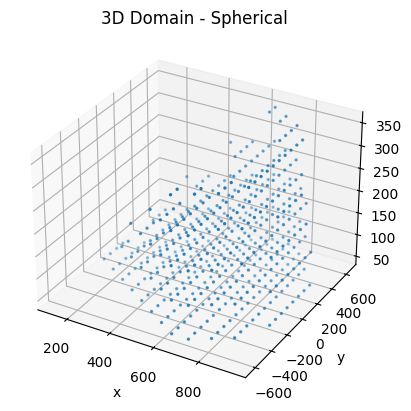

Data generated and saved to /PhD_project/data/processed_sim_data/sandbox
Samples loaded from /PhD_project/results/regression_results/sandbox/instance_2


NameError: name 'Visualiser' is not defined

In [ ]:
sim_model = Model('log_gpm_norm').add_fixed_model_param('H', 5).add_fixed_model_param('I_y',0.22).add_fixed_model_param('I_z',0.2).add_fixed_model_param('Q',3.41e13)
sim_domain = Domain(3, 'spherical')
sim_domain.add_domain_param('radius', 1000).add_domain_param('mass', 10000).add_domain_param('theta', [-np.pi/8,np.pi/8]).add_domain_param('phi', [-np.pi/4,np.pi/4]).add_domain_param('center', [0,0,5])
sim_domain.build_domain()
sim_domain.cut_domain([0,0,0], [0,0,-1])
sim_domain.plot_domain()
sim_data_processor = SimDataProcessor('sandbox', sim_model, sim_domain,noise_dist='gaussian' ,noise_percentage=0.1)

model = Model('log_gpm_norm').add_fixed_model_param('H', 5).add_fixed_model_param('Q',3.41e13)
likelihood = Likelihood('gaussian_percentage_error')

I_y = Parameter(name='I_y',prior_select='uniform').add_prior_param('low',  0.0001).add_prior_param('high', 1)
I_z = Parameter(name='I_z',prior_select='uniform').add_prior_param('low',  0.0001).add_prior_param('high', 1)

error = Parameter(name='error',prior_select='uniform').add_prior_param('low',  0.0001).add_prior_param('high', 1)

inference_params = pd.Series({'I_y': I_y, 'I_z': I_z, 'error':error})

sampler = Sampler(inference_params, model, likelihood, sim_data_processor, n_samples = 10000, n_chains=3)
sampler.sample_all()


vis_domain = Domain(3, 'spherical')
vis_domain.add_domain_param('radius', 1000).add_domain_param('mass', 100000).add_domain_param('theta', [-np.pi/8,np.pi/8]).add_domain_param('phi', [-np.pi/4,np.pi/4]).add_domain_param('center', [0,0,5])
vis_domain.build_domain()
vis_domain.cut_domain([0,0,0], [0,0,-1])

vis_domain.apply_cross_section([0,0,5], [0,-1,0], width=100)
vis_domain.apply_cross_section([0,0,5], [0,0,1], width=100)
vis_domain.plot_cross_sections()
visualiser = RegressionVisualiser(sampler)
visualiser.show_predictions(vis_domain, 'test_plot', '2D_cross_sections', title = 'Concentration')
visualiser.show_predictions(vis_domain, 'test_plot', '3D', title = 'Concentration')
visualiser.show_predictions(vis_domain, 'test_plot', '3D_fixed', title = 'Concentration')